# Regression Logistics

In [34]:
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import pandas as pd

In [4]:
ds = datasets.load_breast_cancer()
print(ds.keys())
cols = ds.feature_names
cols = [i.replace(' ','_') for i in cols]
cols.append('breast_cancer')
filename = ds.filename

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
breast = pd.read_csv(filename, header=None, names=cols)
breast.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,breast_cancer
0,569.00,30.00,malignant,benign,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.99,10.38,122.8,1001,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
2,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
3,19.69,21.25,130,1203,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0


In [6]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 31 columns):
mean_radius                570 non-null float64
mean_texture               570 non-null float64
mean_perimeter             570 non-null object
mean_area                  570 non-null object
mean_smoothness            569 non-null float64
mean_compactness           569 non-null float64
mean_concavity             569 non-null float64
mean_concave_points        569 non-null float64
mean_symmetry              569 non-null float64
mean_fractal_dimension     569 non-null float64
radius_error               569 non-null float64
texture_error              569 non-null float64
perimeter_error            569 non-null float64
area_error                 569 non-null float64
smoothness_error           569 non-null float64
compactness_error          569 non-null float64
concavity_error            569 non-null float64
concave_points_error       569 non-null float64
symmetry_error             569 no

In [7]:
breast.dropna(subset=['mean_smoothness'], inplace=True)
breast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 1 to 569
Data columns (total 31 columns):
mean_radius                569 non-null float64
mean_texture               569 non-null float64
mean_perimeter             569 non-null object
mean_area                  569 non-null object
mean_smoothness            569 non-null float64
mean_compactness           569 non-null float64
mean_concavity             569 non-null float64
mean_concave_points        569 non-null float64
mean_symmetry              569 non-null float64
mean_fractal_dimension     569 non-null float64
radius_error               569 non-null float64
texture_error              569 non-null float64
perimeter_error            569 non-null float64
area_error                 569 non-null float64
smoothness_error           569 non-null float64
compactness_error          569 non-null float64
concavity_error            569 non-null float64
concave_points_error       569 non-null float64
symmetry_error             569 no

In [8]:
breast['mean_perimeter'] = breast['mean_perimeter'].astype('float')
breast['mean_area'] = breast['mean_area'].astype('float')
breast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 1 to 569
Data columns (total 31 columns):
mean_radius                569 non-null float64
mean_texture               569 non-null float64
mean_perimeter             569 non-null float64
mean_area                  569 non-null float64
mean_smoothness            569 non-null float64
mean_compactness           569 non-null float64
mean_concavity             569 non-null float64
mean_concave_points        569 non-null float64
mean_symmetry              569 non-null float64
mean_fractal_dimension     569 non-null float64
radius_error               569 non-null float64
texture_error              569 non-null float64
perimeter_error            569 non-null float64
area_error                 569 non-null float64
smoothness_error           569 non-null float64
compactness_error          569 non-null float64
concavity_error            569 non-null float64
concave_points_error       569 non-null float64
symmetry_error             569 

In [21]:
X = breast.drop('breast_cancer', axis=1).values
y = breast['breast_cancer'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)

[1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        80
         1.0       0.97      0.97      0.97       148

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228

[[ 76   4]
 [  4 144]]


### ROC Curve

In [31]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

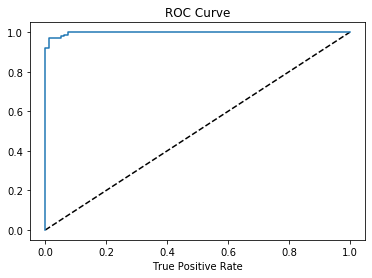

In [38]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()